# Logistic Regression

## Importing the libraries

In [2]:
import pandas as pd

## Importing the dataset

In [4]:
dataset = pd.read_csv('Dataset/breast_cancer.csv')
X = dataset.iloc[:, 1:-1] # the first column not needed so we choose feature from the second column onwards
y = dataset.iloc[:, -1]

In [29]:
X.iloc[:,1]

0       1
1       4
2       1
3       8
4       1
       ..
678     1
679     1
680    10
681     8
682     8
Name: Uniformity of Cell Size, Length: 683, dtype: int64

## Investigating Dataset Before Spliting the data and training

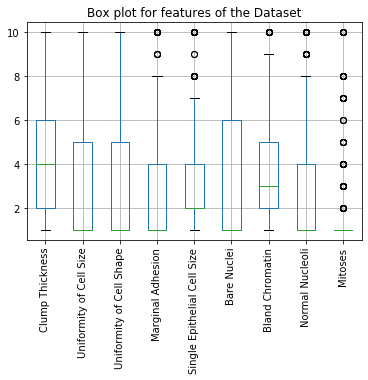

In [35]:
box_plot_features = X.boxplot(rot=90)
box_plot_features.set_title("Box plot for features of the Dataset")
box_plot_features

In [5]:
X

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1
679,2,1,1,1,2,1,1,1,1
680,5,10,10,3,7,3,8,10,2
681,4,8,6,4,3,4,10,6,1


In [6]:
y

0      2
1      2
2      2
3      2
4      2
      ..
678    2
679    2
680    4
681    4
682    4
Name: Class, Length: 683, dtype: int64

## Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Logistic Regression model on the Training set

In [8]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predicting the Test set results

In [10]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

In [11]:
# the confusion matrix tells us the number of correct and wrong predictions that were made by the model from the test set
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[84,  3],
       [ 3, 47]])

## Computing the accuracy with k-Fold Cross Validation

In [18]:
from sklearn.model_selection import cross_val_score
# the cross val score function is able to make k-fold test sets to find out how accurately the model has been trained
model_accuracy = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv = 10)
print("Accuracy of model = {:.2f} %".format(model_accuracy.mean()*100))
print("Model Standard deviation = {:.2f} %".format(model_accuracy.std()*100) + " Thus the model is only off by this percentage")

Accuracy of model = 96.70 %
Model Standard deviation = 1.97 % Thus the model is only off by this percentage
